# Importing the libraries


In [540]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# Loading the dataset

In [541]:
# loading the Toyota.csv
df=pd.read_csv("Toyota.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [542]:
# checking the datatypes of the features
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [543]:
# checking the shape
df.shape

(1436, 11)

# Checking the null values

In [544]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [545]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# removing the constant value column

In [546]:
# here Cyclinders column  have the constant value for all records
df["Cylinders"].unique()
df.drop("Cylinders",axis=1,inplace=True)
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


# Boxplot for detecting the outliers

[array([4, 4, 4, 2, 2, 1, 1])]

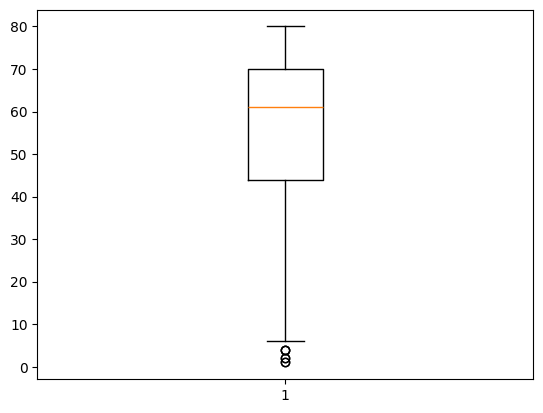

In [547]:
# Boxplot for Age_column
Age_b=plt.boxplot(df['Age_08_04'])
list=[]
for i in Age_b['fliers']:
  list.append(i.get_ydata())
list

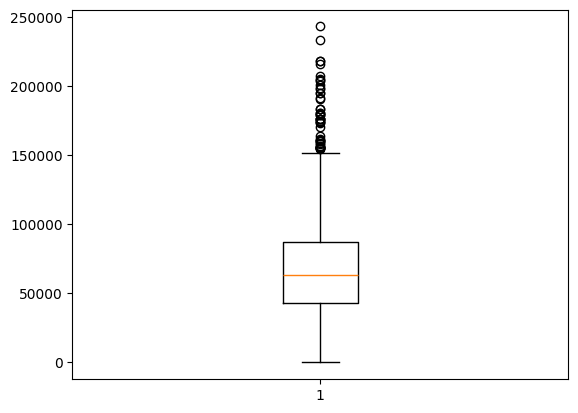

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,5,1110
187,9500,38,180638,Diesel,90,0,2000,4,5,1160
188,11950,40,179860,Diesel,90,0,2000,5,5,1205
189,7750,43,178858,CNG,110,0,1600,3,5,1084
190,11950,40,161000,Diesel,69,0,1900,3,5,1105
191,4350,44,158320,Diesel,69,0,1800,5,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,5,1095
380,7000,53,176000,Diesel,69,0,1900,3,5,1105
381,7750,54,174139,Diesel,72,0,2000,4,5,1100


In [548]:
#Boxplot for KM column
box_k = plt.boxplot("KM",data=df)
plt.show()
list1=[]
for x in box_k['caps']:
  list1.append(x.get_ydata())
df[df['KM']>151300]


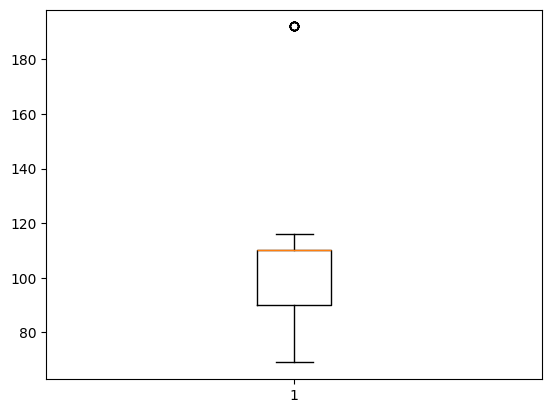

[array([192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192])]

In [549]:
# boxplot for Hp column
box_H=plt.boxplot("HP",data=df)
plt.show()
list1=[]
for x in box_H['fliers']:
  list1.append(x.get_ydata())
list1

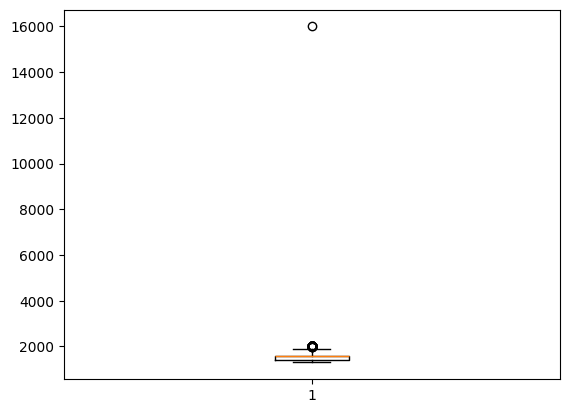

In [550]:
# Boxplot for CC column
box_C=plt.boxplot("cc",data=df)
list1=[]
for x in box_C['fliers']:
  list1.append(x.get_ydata())
# treated the most extreme outlier
df.loc[df.cc==16000,'cc']= 1900


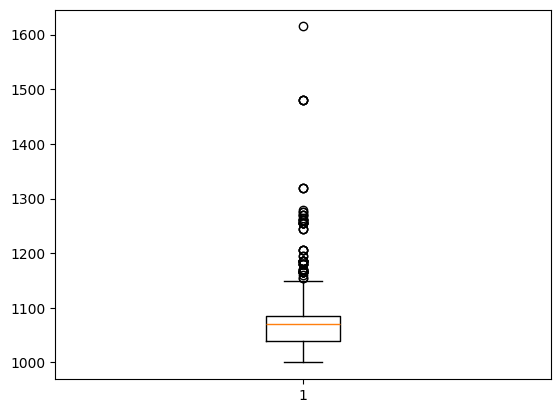

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1320, 1270, 1280,
        1270, 1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205,
        1205, 1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172])]

In [551]:
# Boxplot for Weight column
box_W=plt.boxplot("Weight",data=df)
plt.show()
list1=[]
for x in box_W['fliers']:
  list1.append(x.get_ydata())
list1

### These outliers are the orginal outliers.That's why we can't treat the outliers.

# Encoding

In [552]:
# Applying Onehot encoding to the Categorical Columns
from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder()
res=hot.fit_transform(df[["Fuel_Type"]]).toarray().astype('int64')
df1=pd.DataFrame(res,columns=hot.get_feature_names_out())
df3=df1.join(df.drop("Fuel_Type",axis=1))



In [553]:
# droping the target value column(Price) and Weight
# Beacuse Weight column is not much important feature
x=df3.drop(['Price','Weight'],axis=1)
y=df3["Price"]


# standarization of the columns

In [554]:
# importing the scale
df=scale(x)
df
df3=pd.DataFrame(df,columns=x.columns)
df3

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Age_08_04,KM,HP,Automatic,cc,Doors,Gears
0,-0.109454,2.874807,-2.710874,-1.771966,-0.574695,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
1,-0.109454,2.874807,-2.710874,-1.771966,0.117454,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
2,-0.109454,2.874807,-2.710874,-1.718184,-0.715386,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
3,-0.109454,2.874807,-2.710874,-1.610620,-0.547650,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
4,-0.109454,2.874807,-2.710874,-1.395491,-0.801028,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
5,-0.109454,2.874807,-2.710874,-1.287926,-0.200922,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
6,-0.109454,2.874807,-2.710874,-1.556838,0.695556,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
7,-0.109454,2.874807,-2.710874,-1.395491,0.196188,-0.768042,-0.242893,2.311337,-1.085139,-0.140425
8,-0.109454,-0.347849,0.368885,-1.556838,-1.302450,6.042918,-0.242893,1.243654,-1.085139,-0.140425
9,-0.109454,2.874807,-2.710874,-1.771966,0.069472,-2.170298,-0.242893,1.777495,-1.085139,-0.140425


# spliting the training and testing values

In [555]:
# obtaining the training and testing samples
x_train,x_test,y_train,y_test=train_test_split(df3,y,test_size=0.2,random_state=42)
pd.options.display.max_rows=9999
x_test.isnull().sum()

,0
Fuel_Type_CNG,0
Fuel_Type_Diesel,0
Fuel_Type_Petrol,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0


# Modeling Step

In [556]:
# importing the all models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
Lin=LinearRegression()
Dis=DecisionTreeRegressor(criterion="squared_error",max_depth=4)
KNN=KNeighborsRegressor(n_neighbors=10)
Lin.fit(x_train,y_train)
Dis.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [557]:
# coefficients and intercepts
print(Lin.coef_)
print(Lin.intercept_)

[ -280.33277384   827.7989746   -697.7134436  -2554.45132944
  -670.16499276  1296.75337824   235.10674208  -764.13165363
   241.12204444   115.97952118]
10742.561335870394


# Predicting the values

In [558]:
# predicting the y values using Multiple LinearRegression
y_predict=Lin.predict(x_test)
# predicting the y values using Dicision Tree Regressor
Y_predict=Dis.predict(x_test)
# predicting the y values using KNN
Y1_predict=KNN.predict(x_test)
Y1_predict

array([10306. ,  8275. ,  9160. ,  8555. , 10060. ,  8354. ,  8770. ,
        8785. , 13163.9, 12533. ,  9204.5,  8394.5, 12569.5, 12035. ,
        9215. ,  9030. , 11075. , 17855. ,  7960. ,  9250. , 12604. ,
       19385. ,  7910. , 10108. ,  7857.5, 16329.5,  9029.5,  8005. ,
       15224.5, 14765. ,  7810. ,  9779.5,  8244.5,  9625. ,  9705. ,
        7965. ,  8970. ,  8840. , 16305. ,  9515. ,  9085. ,  8999.5,
        7843.5,  7100. ,  7539. , 17810. ,  8900. , 10605. ,  9029. ,
       13094.5, 12755. ,  7695. , 13964. , 16177.5,  7440. ,  8354. ,
       10574. , 10354. , 16159.5, 19240. , 11624.5,  8090. ,  8169.5,
       10720. , 12782.5,  9095. , 11644. ,  7960. ,  8330. , 10395. ,
       19320. , 11144.5, 12610. ,  8064. , 20254.5, 12485. ,  8780. ,
        8120. ,  9305. ,  8805. ,  9865. ,  8790. ,  9970. , 10229. ,
        8525. ,  7390. , 10160. , 13026.5,  9000. , 11254. ,  8010. ,
        7610. ,  9934. ,  9630. , 12514.5,  9050. , 23575. ,  7984. ,
       13234.5,  892

# Model Valadation

In [559]:
# importing the r2_score metric and Displaying the score
from sklearn.metrics import r2_score
print(f'Linear_regression:{r2_score(y_test,y_predict)}')
print(f'Discision_tree:{r2_score(y_test,Y_predict)}')
print(f'KNN:{r2_score(y_test,Y_predict)}')

Linear_regression:0.8545393953465398
Discision_tree:0.8922688879476584
KNN:0.8922688879476584


#### When we have tried with three different models Dicision Tree and KNN gives the more accurate result than the Multiple Linear Regression.

#### In these case, Ridge and Lasso Regression can't apply because model peforms well on both training and test data instead we increase the model performance by doing some EDA.

# Ridge Regression

In [560]:
# importing the ridge model
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.5)
rid.fit(x_train,y_train)

Ridge(alpha=0.5)

In [561]:
# predcting the values
r_predict=rid.predict(x_test)

In [562]:
# model valadation
r2_score(y_test,r_predict)

0.8544255825355493

#### Ridge and multiple linear regression is almost gives the eqavaluent accuracy and coefficents.

# Lasso Regression

In [563]:
# importing the lasso regression

from sklearn.linear_model import Lasso
las=Lasso(alpha=0.5)
las.fit(x_train,y_train)

Lasso(alpha=0.5)

In [564]:
# predicting the values
y_predict=las.predict(x_test)

In [565]:
# Valadating the model
r2_score(y_test,y_predict)

0.8543921848887263

### both Lasso and Ridge regualization techniques gives the same accuracy

# Interview Questions:

## Normalization

### normalization is a technique used to convert the data into normal distribution.It is bell shaped curve.
### In the normal distribution the values are range in between -3 to +3.

### Norm=X-Xmin/Xmax-Xmin

## Standardization

#### standardization is a technique used to convert the numeric columns with different ranges into one range by using the formula
Z=x-mu/sigma

### Both are the Feature Scaling techniques

# Multicolinearity

### Multicollinearity occurs when two or more independent variables (features) in a dataset are highly correlated with each other — meaning they carry similar information

### Techniques are:
### Correlation matrix (values close to +1 or -1 indicate high collinearity)

### VIF (Variance Inflation Factor) — if VIF > 5 (or 10), it indicates strong multicollinearity.